# **Assessment 1**
## MTH377 - Convex Optimization

In [83]:
!pip3 install numdifftools
import numdifftools as nd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Problem 1 (Taylor Approximation)**
Consider the univariate function

> $ f(x) = x^2 + \log{x} $

Suppose we want to approximate the function values in the vicinity of $x = 1$ using Taylor polynomials. Lets call the linear approximation function (linear Taylor polynomial) as $L(x)$ and the quadratic approximation function (quadratic Taylor polynomial) as $Q(x)$

(a) Plot $f(x)$, $L(x)$ and $Q(x)$ in the interval $[0, 2]$ in the same graph.

(b) Let the error associated with the linear approximation be given by $e_L(x) = f(x) − L(x)$, and the error associated with the quadratic approximation be given by $e_Q(x) = f(x)−Q(x)$.

Plot $\frac{e_L(x)}{x-1}$ and $\frac{e_Q(x)}{(x-1)^2}$ in the interval $[0, 2]$ in the same graph.


### Solution (a)

Taylor Series: 
> $ f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + ... $

Using Taylor approximations around the point $a=1$, we find that:

> $L(x) = f(1) + f'(1)(x-1) = f(1) + (2(1) + \frac{1}{(1)})(x-1)$

> $Q(x) = f(1) + f'(1)(x-1) + \frac{f''(1)}{2!}(x-1)^2 = f(1) + (2(1) + \frac{1}{(1)})(x-1) + \frac{2(1) - \frac{1}{(1)^2}}{2}(x-1)^2$

Simplifying further:

> $L(x) = f(1) + 3(x-1)$

> $Q(x) = f(1) + 3(x-1) + \frac{1}{2}(x-1)^2$

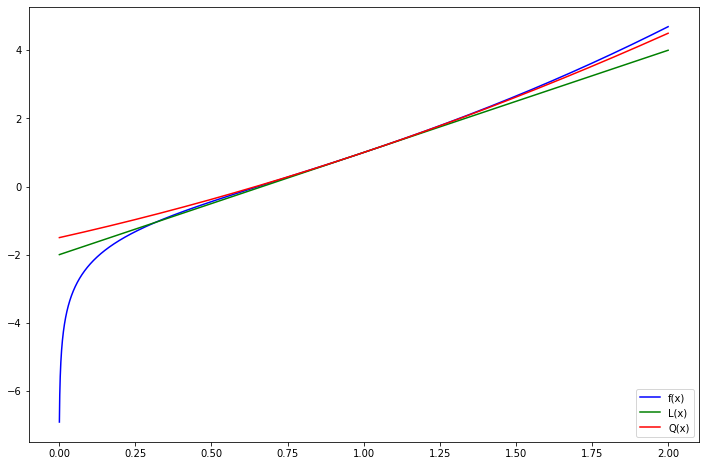

In [84]:
# definition of f(x)
def f1(x):
  return x**2 + np.log(x)

# definition of L(x), the linear approximation of f(x)
def L(x):
  return f1(1) + (3)*(x-1)

# definition of Q(x), the quadratic approximation of f(x)
def Q(x):
  return f1(1) + (3)*(x-1) + (1)*((x-1)**2)/2


# initiating the x - linespace
xLin = np.linspace(0.001, 1.999, 10000)

# calculating the y-values for each point in the linespace for all three functions
y1 = f1(xLin)
y2 = L(xLin)
y3 = Q(xLin)

# plotting the functions
fig = plt.figure(figsize=(12, 8))

plt.plot(xLin, y1, 'b', label='f(x)')
plt.plot(xLin, y2, 'g', label='L(x)')
plt.plot(xLin, y3, 'r', label='Q(x)')

plt.legend(loc='lower right')
plt.show()

#### Solution (b)

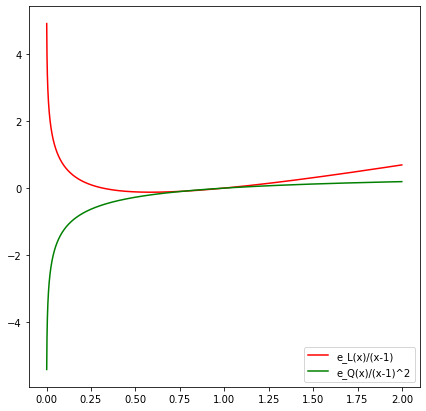

In [85]:
# defining the error b/w f(x) and L(x)
def e_L(x):
  return f1(x) - L(x)

# defining the error b/w f(x) and Q(x)
def e_Q(x):
  return f1(x) - Q(x)

# defining z1 and z2 which are to be plotted
z1 = e_L(xLin)/(xLin-1)
z2 = e_Q(xLin)/((xLin-1)**2)


# plotting the functions
fig = plt.figure(figsize=(7, 7))

plt.plot(xLin, z1, 'r', label='e_L(x)/(x-1)')
plt.plot(xLin, z2, 'g', label='e_Q(x)/(x-1)^2')

plt.legend(loc='lower right')
plt.show()

As can be seen in the above graph, the error associated with the linear approximation $L(x)$ increases as we move farther from the point at which we are approximating the function, while the quadratic approximation $Q(x)$ remains close to $0$.



## **Problem 2 (Combined Descent Algorithm)**
Write a code to compute the unconstrained minimum of the following optimization problem by implementing a **combination descent algorithm** with initial point $(1, 1)$.


> $\min\limits_{x, y} f(x, y) = (x^2 - 3y^2)^2 + \sin^2(x^2 + y^2)$


### **Solution**
#### Combined Descent Algorithm

> while $(||∇f|| > η) $
> {
  1. if $Hf(x)$ is positive definite, $d = [Hf(x)]^{-1}(-∇f(x))$; else $d = -∇f(x)$.
  2. Line Search: choose step-size $t > 0$ and backtrack to a favourable $t$.
  3. update $x := x + t \cdot d$
> }

Chosen parameters
- eta, tolerance: $0.0001$
- alpha: $0.3$
- beta: $0.6$

In [86]:

def f(X):
    # f takes a 1-D array X as input and returns the value of the mathematical function f at this point
    return (X[0]**2 - 3*X[1]**2)**2 + np.sin(X[0]**2 + X[1]**2)**2


# specify initial point x0 as a 1-D ndarray
init_X = np.array([1, 1])

# initiate X, grad_f and the paramaters alpha, beta and eta
curr_X = init_X
grad_f = nd.Gradient(f)
eta = 0.0001
alpha = 0.3
beta = 0.6

# iteration counter for output
iter = 0

# while the length of the grad_f vector is greater than the tolerance eta
while ( math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2) > eta ):

    # direction vector is initialised to -grad_f by default (Gradient Descent)
    dirn = -1*grad_f(curr_X)

    # compute the Hessian
    H = nd.Hessian(f)(curr_X)

    # check if all the eigenvalues of the Hessian are positive
    for i in np.linalg.eigvals(H):
        if i <= 0:
            break
            # breaks if a value is non-positive
    else:
        # the direction value is changed to the direction as in Newton Descent
        dirn = np.dot(-1*np.linalg.inv(H), grad_f(curr_X))


    # Linear Search
    t = 1

    # while delta_f is less than -1*alpha*Df(x)(t*direction)
    # Df(x)(t*direction) = transpose(grad_f) . t*direction
    while ( f(curr_X) - f(curr_X + t*dirn) < -1*alpha*np.dot( np.transpose(grad_f(curr_X)), t*dirn ) ):
        # update t
        t = beta * t

    print(f"AT ITERATION {iter}________________________________________________________________________________________")
    print( f"curr_X :\t\t{curr_X} \t ||grad_f|| : {math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2)}" )
    print( f"Direction Derivative : {np.dot( np.transpose(grad_f(curr_X)), t*dirn )} \t\t direction vector : {dirn}" )
    print( f"-del_f : \t\t{f(curr_X) - f(curr_X + t*dirn)} \t\t t (step-size) : {t}\n" )
    
    # update curr_X
    curr_X = curr_X + t*dirn

    # increment the counter
    iter+=1


print(f"\nMinima At : {curr_X}")
print(f"Function value at minima : {f(curr_X)}")
print(f"Current ||grad_f|| : {math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2)}")

AT ITERATION 0________________________________________________________________________________________
curr_X :		[1 1] 	 ||grad_f|| : 24.4161143598961
Direction Derivative : -10.012974356217539 		 direction vector : [  9.51360499 -22.48639501]
-del_f : 		3.8191136819628557 		 t (step-size) : 0.016796159999999997

AT ITERATION 1________________________________________________________________________________________
curr_X :		[1.15979203 0.62231491] 	 ||grad_f|| : 1.767715181291036
Direction Derivative : -0.14579146018685427 		 direction vector : [-0.11362032  1.76405992]
-del_f : 		0.0485474238901068 		 t (step-size) : 0.046655999999999996

AT ITERATION 2________________________________________________________________________________________
curr_X :		[1.15449096 0.70461889] 	 ||grad_f|| : 1.9674524292668287
Direction Derivative : -0.1805992669299822 		 direction vector : [ 1.86467232 -0.62758761]
-del_f : 		0.10041178580898713 		 t (step-size) : 0.046655999999999996

AT ITERATION 3____

## **Problem 3 (Combined Descent Algorithm)**
Suppose $S$ is a subset of $\mathbb{R}^n$ that is defined by a collection of inequalities:

> $S = \{ x ∈ \mathbb{R}^n :$ for every $j = 1, ..., m, g_j(x) ≥ 0\}$

Associated with any such set $S$ is the potential function defined as

> $\Psi(x) = -\sum_{j=1}^{m} \log{(g_j(x))}$

The analytic center of the set $S$ is the vector that minimizes the associated potential function i.e. the vector $x$ that solves

> $\min\limits_{x} \Psi(x)$

As an example instance, suppose $S$ is a subset of $\mathbb{R}^2$ described as above by three linear inequalities given by

> $g_1(x_1, x_2) = 2x_2 - x_1$

> $g_2(x_1, x_2) = 2x_1 - x_2$

> $g_3(x_1, x_2) = 1 - x_1 - x_2$

Frame the problem as an unconstrained optimization problem and write a code that uses the
combination descent algorithm with initial point (0.25, 0.25) to compute the analytic center
of $S$.

### **Solution**

> $\Psi(x) = -\sum_{j=1}^{m} \log{(g_j(x))} = -\log{ (\prod_{j=1}^{m} g_j(x)) } = \log{\frac{1}{\prod_{j=1}^{m} g_j(x)}}$

Since minimizing $\log{f(x)}$ is equivalent to minimizing $f(x)$, we evaluate

> $\min\limits_{x} (\frac{1}{\prod_{j=1}^{m} g_j(x)})$

Set $S$ is defined on the functions $g_1(x1, x2)$, $g_2(x1, x2)$, and $g_3(x1, x2)$ given above. So, we minimize as follows:

> $\min\limits_{x} (\frac{1}{g_1(X) \cdot g_2(X) \cdot g_3(X)})$


In [91]:
# defining g1(x)
def g_1(X):
    return 2*X[1] - X[0]


# defining g2(x)
def g_2(X):
    return 2*X[0] - X[1]


# defining g3(x)
def g_3(X):
    return 1 - X[0] - X[1]


# defining the function we need to minimize
def cost_func(X):
    return 1 / (g_1(X) * g_2(X) * g_3(X))

# initial value of X
init_X = np.array([0.25, 0.25])

# initiating the current value of X
curr_X = init_X

# computing the Gradient of the cost function
grad_cost = nd.Gradient(cost_func)

# initialising parameters
eta = 0.0001
alpha = 0.3
beta = 0.5

# initialising counter
iter = 0

# while the length of the grad_f vector is greater than the tolerance eta
while ( math.sqrt(grad_cost(curr_X)[0]**2 + grad_cost(curr_X)[1]**2) > eta ) :

    # direction vector is initialised to -grad_f by default (Gradient Descent)
    dirn = -1*grad_cost(curr_X)

    # compute the Hessian matrix of the cost function
    H = nd.Hessian(cost_func)(curr_X)

    # check if all the eigenvalues of the Hessian are positive
    for i in np.linalg.eigvals(H):
        if i <= 0:
            break
    else:
        # the direction value is changed to the direction as in Newton Descent
        dirn = np.dot(-1*np.linalg.inv(H), grad_cost(curr_X))
    

    # Linear Search
    t = 1

    # while delta_f is less than -1*alpha*Df(x)(t*direction)
    # Df(x)(t*direction) = transpose(grad_f) . t*direction
    while ( cost_func(curr_X) - cost_func(curr_X + t*dirn) < -1*alpha*np.dot( np.transpose(grad_cost(curr_X)), t*dirn ) ) :
        # update step-size, t
        t = beta * t

    print(f"AT ITERATION {iter}________________________________________________________________________________________")
    print( f"curr_X :\t\t{curr_X} \t ||grad_f|| : {math.sqrt(grad_cost(curr_X)[0]**2 + grad_cost(curr_X)[1]**2)}" )
    print( f"Direction Derivative : {np.dot( np.transpose(grad_cost(curr_X)), t*dirn )} \t\t direction vector : {dirn}" )
    print( f"-del_f : \t\t{cost_func(curr_X) - cost_func(curr_X + t*dirn)} \t\t t (step-size) : {t}\n" )
    
    # update curr_X
    curr_X = curr_X + t*dirn

    # increment the counter 
    iter += 1

if (g_1(curr_X) > 0 and g_2(curr_X) > 0 and g_2(curr_X) > 0) :
    print("\nPoint satisfies the `g_i(x) > 0` constraint.")

print(f"\nMinima At : {curr_X}")
print(f"Function value at minima : {cost_func(curr_X)}")
print(f"Current ||grad_f|| : {math.sqrt(grad_cost(curr_X)[0]**2 + grad_cost(curr_X)[1]**2)}\n\n")


AT ITERATION 0________________________________________________________________________________________
curr_X :		[0.25 0.25] 	 ||grad_f|| : 90.50966799186328
Direction Derivative : -7.999999886344217 		 direction vector : [0.0625 0.0625]
-del_f : 		4.693333307470624 		 t (step-size) : 1

AT ITERATION 1________________________________________________________________________________________
curr_X :		[0.3125 0.3125] 	 ||grad_f|| : 20.595978641346267
Direction Derivative : -0.6206061114565193 		 direction vector : [0.02130682 0.02130682]
-del_f : 		0.30650310381254187 		 t (step-size) : 1

AT ITERATION 2________________________________________________________________________________________
curr_X :		[0.33380682 0.33380682] 	 ||grad_f|| : 0.4888440181037405
Direction Derivative : -0.0003268626233877639 		 direction vector : [-0.0004728 -0.0004728]
-del_f : 		0.00016358837765650946 		 t (step-size) : 1

AT ITERATION 3_________________________________________________________________________

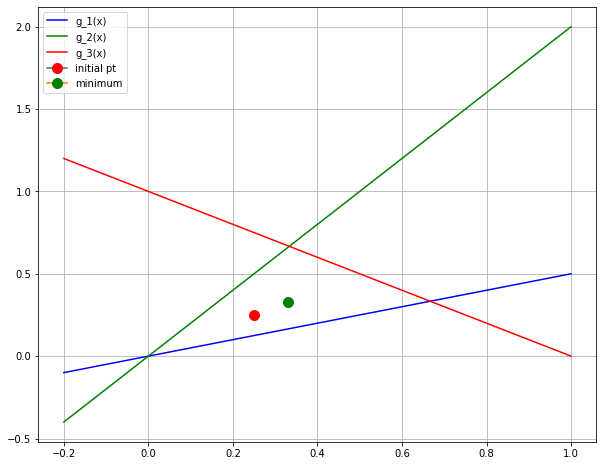

In [88]:
# explanation using a graph

xLin = np.linspace(-0.2, 1, 1000)
y_1 = xLin/2
y_2 = xLin*2
y_3 = -1*xLin + 1

fig = plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(xLin, y_1, 'b', label='g_1(x)')
plt.plot(xLin, y_2, 'g', label='g_2(x)')
plt.plot(xLin, y_3, 'r', label='g_3(x)')
plt.plot([0.25], [0.25], marker=".", markersize=20, markeredgecolor="red", markerfacecolor="red", label='initial pt')
plt.plot([0.33], [0.33], marker=".", markersize=20, markeredgecolor="green", markerfacecolor="green", label='minimum')
plt.legend()

plt.show()

The favourable region: $g_1(x) > 0, g_2(x) > 0$ and $g_3(x) > 0$ is the triangle formed by the three lines above.

As the initial point (red) lies within this region, we are already satisfying the constraint. As we take small steps and move towards the minimum (green), which also lies within the constraint, we stay within the favourable region throughout the entire combined descent routine.
